In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import os as os
from sklearn import preprocessing 
os.getcwd()

'C:\\Users\\gmuni\\Downloads'

In [10]:

df=pd.read_csv('Walmart_Store_sales.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [184]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [84]:
df.shape  ## Given data set has  6435 rows and 8 coulumns

(6435, 8)

In [90]:
df.columns  ## Given data set has Columns as listed below

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [18]:
df.isna().sum()  ## Given data set has no Null values in it

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [92]:
df.duplicated().sum() ## Given data set has no Duplicated datas in it

0

In [94]:
df_sales=df.groupby(['Store'],as_index=False)['Weekly_Sales'].sum()
df_sales ## The output displays the sum of sales by each store

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07
5,6,2.237561e+08
6,7,8.159828e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.716177e+08


In [100]:
df_sales.sort_values(by='Weekly_Sales',ascending=False) 
## Displayed out put shows that Store 20 has highest sales of them All

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08
9,10,2.716177e+08
26,27,2.538559e+08
5,6,2.237561e+08
0,1,2.224028e+08
38,39,2.074455e+08


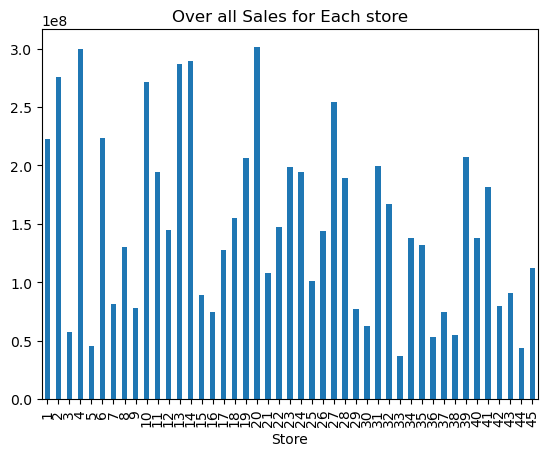

In [331]:
df.groupby('Store')['Weekly_Sales'].sum().plot(kind="bar")
plt.title('Over all Sales for Each store')##Sales Bar graph for stores
plt.show()

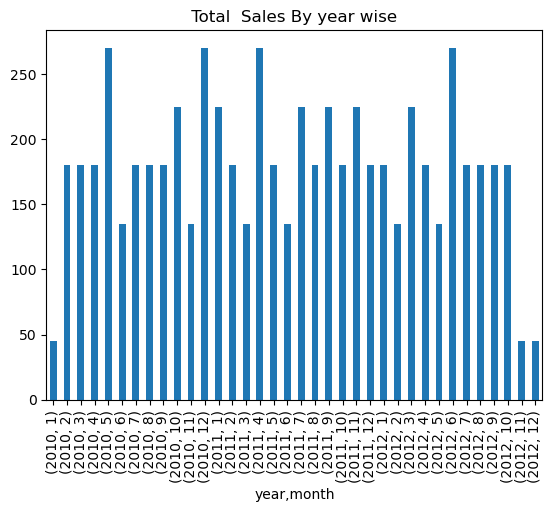

In [335]:
df.groupby(['year','month']).count()['Weekly_Sales'].plot(kind="bar")
plt.title(' Total  Sales By year wise ')
plt.show()

In [162]:
df_std=df.groupby('Store').agg({'Weekly_Sales':['mean','std']})
df_std ## Given Output has the mean and Standard deviation of Weekly sales with respect to the Stores

Weekly_Sales               
               mean            std
Store                             
1      1.555264e+06  155980.767761
2      1.925751e+06  237683.694682
3      4.027044e+05   46319.631557
4      2.094713e+06  266201.442297
5      3.180118e+05   37737.965745
6      1.564728e+06  212525.855862
7      5.706173e+05  112585.469220
8      9.087495e+05  106280.829881
9      5.439806e+05   69028.666585
10     1.899425e+06  302262.062504
11     1.356383e+06  165833.887863
12     1.009002e+06  139166.871880
13     2.003620e+06  265506.995776
14     2.020978e+06  317569.949476
15     6.233125e+05  120538.652043
16     5.192477e+05   85769.680133
17     8.935814e+05  112162.936087
18     1.084718e+06  176641.510839
19     1.444999e+06  191722.638730
20     2.107677e+06  275900.562742
21     7.560691e+05  128752.812853
22     1.028501e+06  161251.350631
23     1.389864e+06  249788.038068
24     1.356755e+06  167745.677567
25     7.067215e+05  112976.788600
26     1.002912e+06  110431.288141
27     1.775216e+06  239930.135688
28     1.323522e+06  181758.967539
29     5.394514e+05   99120.136596
30     4.385796e+05   22809.665590
31     1.395901e+06  125855.942933
32     1.166568e+06  138017.252087
33     2.598617e+05   24132.927322
34     9.667816e+05  104630.164676
35     9.197250e+05  211243.457791
36     3.735120e+05   60725.173579
37     5.189003e+05   21837.461190
38     3.857317e+05   42768.169450
39     1.450668e+06  217466.454833
40     9.641280e+05  119002.112858
41     1.268125e+06  187907.162766
42     5.564039e+05   50262.925530
43     6.333247e+05   40598.413260
44     3.027489e+05   24762.832015
45     7.859814e+05  130168.526635

<Axes: xlabel='Store'>

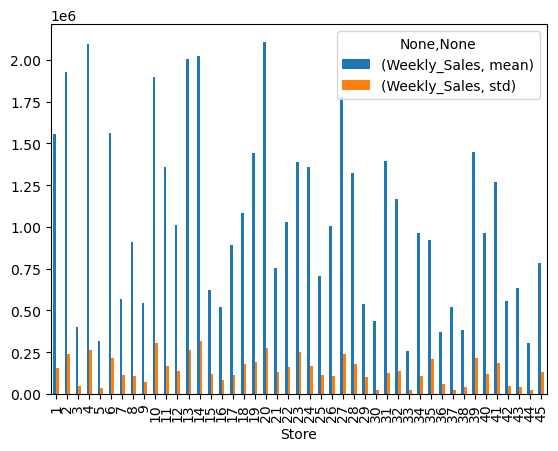

In [186]:
df_std.plot(kind="bar") ## Bar graph represents the Standard deviation of store 20 was greater than All

In [19]:
df['Date']=pd.to_datetime(df['Date'],format='mixed')
df.dtypes ## changed the data type of Date from Object to datetime

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [262]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day_name()
df ## Splitted the year and month from the Given Date column  that makes easier to find the sales for Each year with respective to the store and 
##created a new varibale Day column

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,Monday
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,Friday
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,Thursday
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,Monday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,Friday


In [264]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,Monday
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,Friday
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,Thursday
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,Monday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,Friday


In [88]:
df_12=df.loc[(df['year']==2012)]
df_12 ## Filtered the 2012  Sales  data to find the Q3'2012 sale analysis

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
100,1,2012-06-01,1550369.92,0,49.01,3.157,219.714258,7.348,2012,6
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2012,1
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,2012,1
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,2012,1
104,1,2012-03-02,1636339.65,0,56.55,3.360,220.172015,7.348,2012,3
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


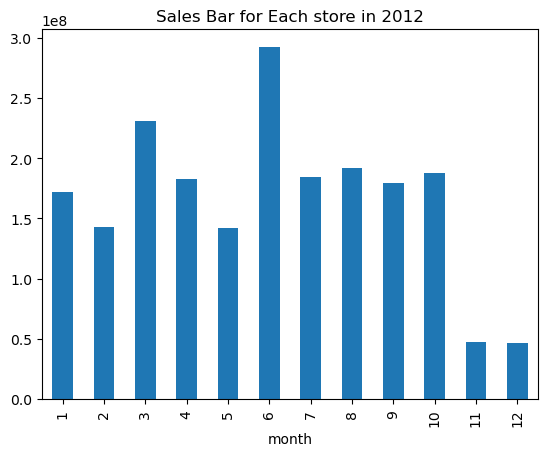

In [132]:
df_12.groupby('month')['Weekly_Sales'].sum().plot(kind="bar")
plt.title('Sales Bar for Each store in 2012')
plt.show() ##Sales Bar graph for stores sales in 2012

In [82]:
df_8=df.loc[(df['month']==8)]
df_8 ## On the Q3 period 8th month has the greater sale

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
27,1,2010-08-13,1508237.76,0,87.00,2.692,211.639421,7.787,2010,8
28,1,2010-08-20,1513080.49,0,86.65,2.664,211.603363,7.787,2010,8
29,1,2010-08-27,1449142.92,0,85.22,2.619,211.567306,7.787,2010,8
35,1,2010-08-10,1508239.93,0,63.93,2.633,211.746754,7.838,2010,8
61,1,2011-08-04,1614259.35,0,67.84,3.622,215.074394,7.682,2011,8
...,...,...,...,...,...,...,...,...,...,...
6373,45,2011-08-26,833979.01,0,72.55,3.704,186.564117,8.625,2011,8
6414,45,2012-08-06,795133.00,0,64.30,3.689,191.015533,8.567,2012,8
6424,45,2012-08-17,722496.93,0,75.71,3.807,191.228492,8.684,2012,8
6425,45,2012-08-24,718232.26,0,72.62,3.834,191.344887,8.684,2012,8


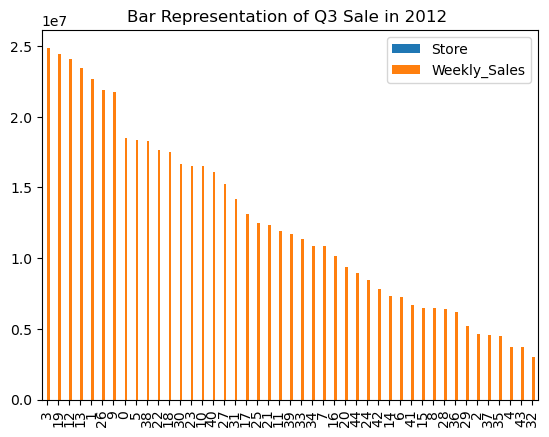

<Axes: title={'center': 'Bar Representation of Q3 Sale in 2012 '}>

In [297]:
Q3_12=df_8.groupby(['Store'],as_index=False)['Weekly_Sales'].sum().sort_values(by='Weekly_Sales',ascending=False).plot(kind="bar")
plt.title('Bar Representation of Q3 Sale in 2012 ')
plt.show()
Q3_12 # Graphical representation shows the store has greater sale on the Q3 2012

In [181]:
holiday=df.loc[(df['Holiday_Flag']==1)]
holiday

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,2010,10
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,12
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2011,11
...,...,...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,2011,9
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,2011,11
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,2011,12
6397,45,2012-10-02,803657.12,1,37.00,3.640,189.707605,8.424,2012,10


In [259]:
df_sales=df.groupby(['Holiday_Flag'],as_index=False)['Weekly_Sales'].mean()
df_sales ## Mean of Weekly sales for Holiday and Non Holiday season of all Stores

,Holiday_Flag,Weekly_Sales
0,0,1.041256e+06
1,1,1.122888e+06


In [263]:
Sale_high=holiday[holiday['Weekly_Sales']>1.041256e+06]
Sale_high ## Stores has high Weekly sales than  Mean of Weekly sales for Holiday and Non Holiday season of all Stores

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,2010,10
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,12
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2011,11
...,...,...,...,...,...,...,...,...,...,...
5819,41,2011-12-30,1264014.16,1,34.12,3.119,196.358610,6.759,2011,12
5825,41,2012-10-02,1238844.56,1,22.00,3.103,196.919506,6.589,2012,10
5855,41,2012-07-09,1392143.82,1,67.41,3.596,198.095048,6.432,2012,7
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724,2010,11


In [100]:
model=df.loc[(df['Store']==1)]
model ## Framed a data containing the Sale details for the store 1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5
...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,2012,9
139,1,2012-05-10,1670785.97,0,68.55,3.617,223.181477,6.573,2012,5
140,1,2012-12-10,1573072.81,0,62.99,3.601,223.381296,6.573,2012,12
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,2012,10


In [266]:
model['Day']=model['Date'].dt.day_name()
model

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,Monday
...,...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,2012,9,Friday
139,1,2012-05-10,1670785.97,0,68.55,3.617,223.181477,6.573,2012,5,Thursday
140,1,2012-12-10,1573072.81,0,62.99,3.601,223.381296,6.573,2012,12,Monday
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,2012,10,Friday


In [200]:
model.select_dtypes(include="object").columns

Index([], dtype='object')

In [202]:
model['Day'].unique()

array([3, 4, 0, 1, 2, 5, 6])

In [150]:
label_encoder = preprocessing.LabelEncoder() ##  preprocessed the date to Numerical values assigned to Days to fit the model

In [180]:
model['Day']= label_encoder.fit_transform(model['Day'])
model

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,3
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,0
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,1
...,...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,2012,9,0
139,1,2012-05-10,1670785.97,0,68.55,3.617,223.181477,6.573,2012,5,4
140,1,2012-12-10,1573072.81,0,62.99,3.601,223.381296,6.573,2012,12,1
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,2012,10,0


In [158]:
model.groupby(['Store','year','Day'],as_index=False)['Weekly_Sales'].sum()
## Sale info for the Store 1 year wise with respect to the Days

,Store,year,Day,Weekly_Sales
0,1,2010,0,45154018.47
1,1,2010,1,3158761.80
2,1,2010,2,6089919.80
3,1,2010,3,4589438.54
4,1,2010,4,3236925.72
5,1,2010,5,11049767.67
6,1,2011,0,53566881.61
7,1,2011,1,3496911.96
8,1,2011,2,3190713.53
9,1,2011,3,9690956.44


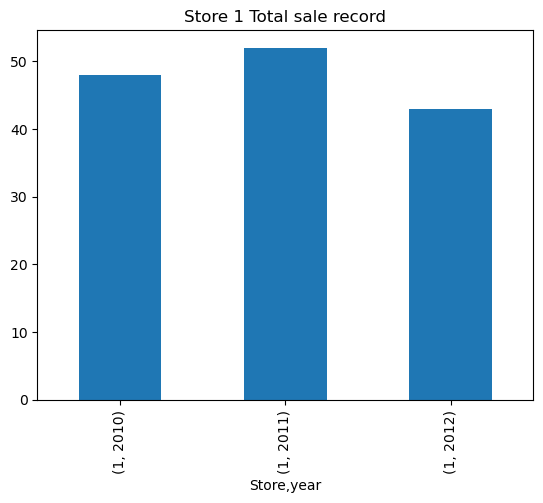

In [50]:
model.groupby(['Store','year']).count()['Weekly_Sales'].plot(kind="bar")
plt.title('Store 1 Total sale record')
plt.show() ## Bar representation of  Sales by Year for store 1 

In [128]:
model.shape ## Shape of the Store 1 data

(143, 11)

In [160]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         143 non-null    int64         
 1   Date          143 non-null    datetime64[ns]
 2   Weekly_Sales  143 non-null    float64       
 3   Holiday_Flag  143 non-null    int64         
 4   Temperature   143 non-null    float64       
 5   Fuel_Price    143 non-null    float64       
 6   CPI           143 non-null    float64       
 7   Unemployment  143 non-null    float64       
 8   year          143 non-null    int32         
 9   month         143 non-null    int32         
 10  Day           143 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int32(2), int64(3)
memory usage: 12.3 KB


In [58]:
model.isnull().sum() ## No null values in store 1 data

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
year            0
month           0
dtype: int64

In [130]:
model.duplicated().sum()## No Duplicated values in store 1 data

0

In [162]:
model.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,143.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Date,143,2011-06-17 20:18:27.692307712,2010-01-10 00:00:00,2010-10-13 12:00:00,2011-06-17 00:00:00,2012-02-27 12:00:00,2012-12-10 00:00:00,NaN
Weekly_Sales,143.0,1555264.397552,1316899.31,1458104.69,1534849.64,1614892.03,2387950.2,155980.767761
Holiday_Flag,143.0,0.06993,0.0,0.0,0.0,0.0,1.0,0.255926
Temperature,143.0,68.306783,35.4,58.265,69.64,80.485,91.65,14.250486
Fuel_Price,143.0,3.219699,2.514,2.7645,3.29,3.594,3.907,0.427313
CPI,143.0,215.996892,210.337426,211.549277,215.459905,220.53133,223.444251,4.35089
Unemployment,143.0,7.61042,6.573,7.348,7.787,7.838,8.106,0.383749
year,143.0,2010.965035,2010.0,2010.0,2011.0,2012.0,2012.0,0.799759
month,143.0,6.475524,1.0,4.0,6.0,9.0,12.0,3.333213


In [72]:
import warnings
warnings.filterwarnings("ignore")

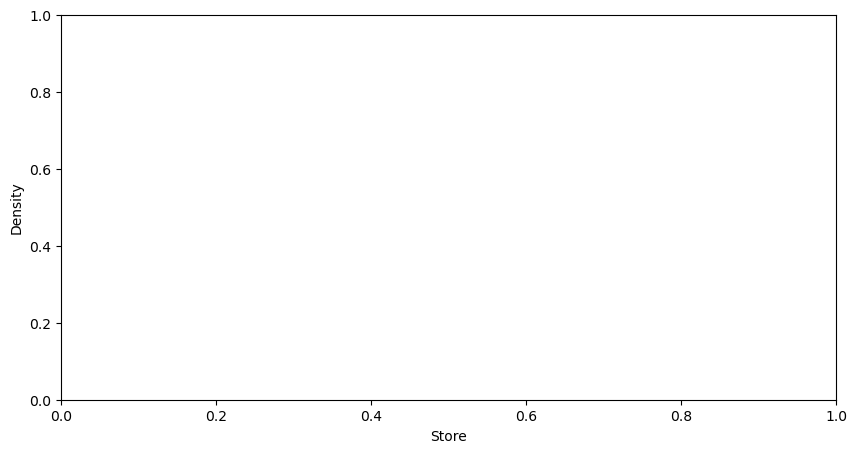

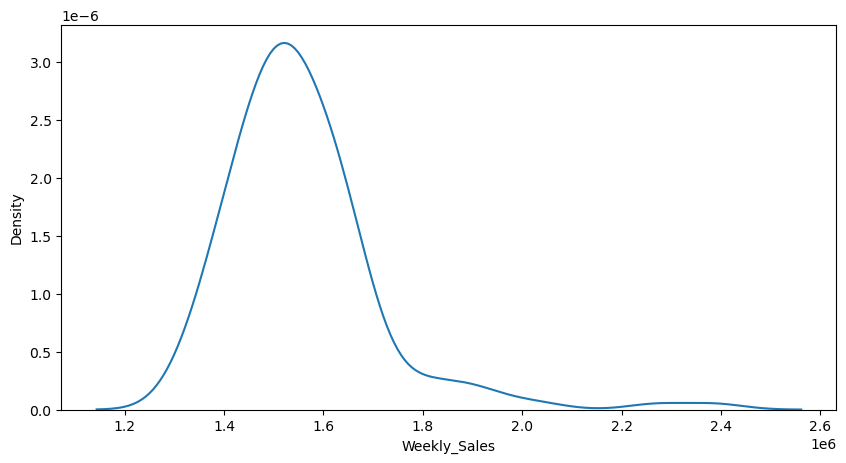

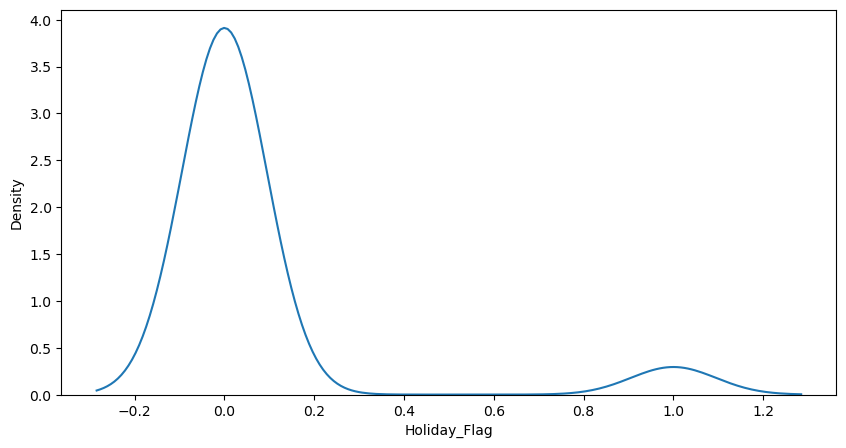

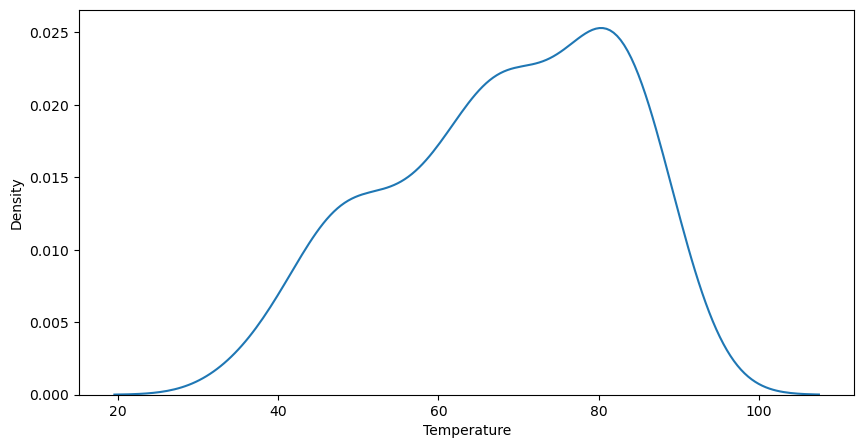

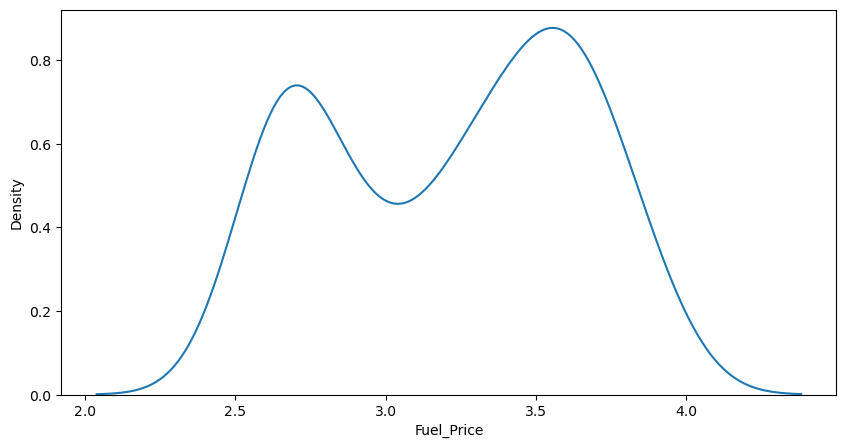

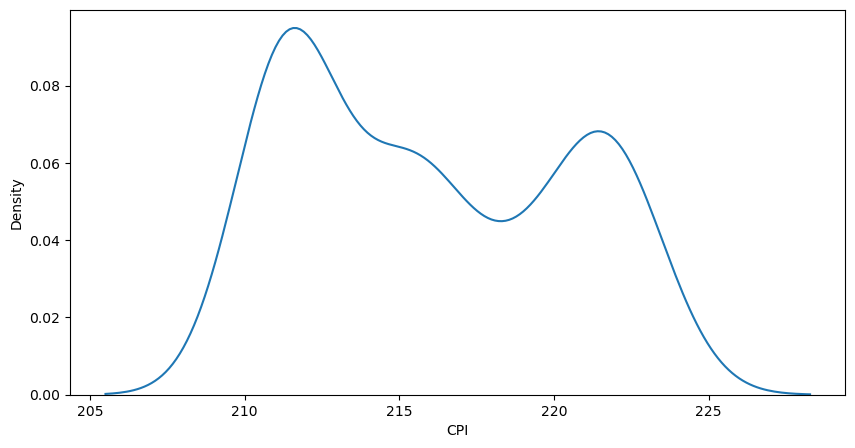

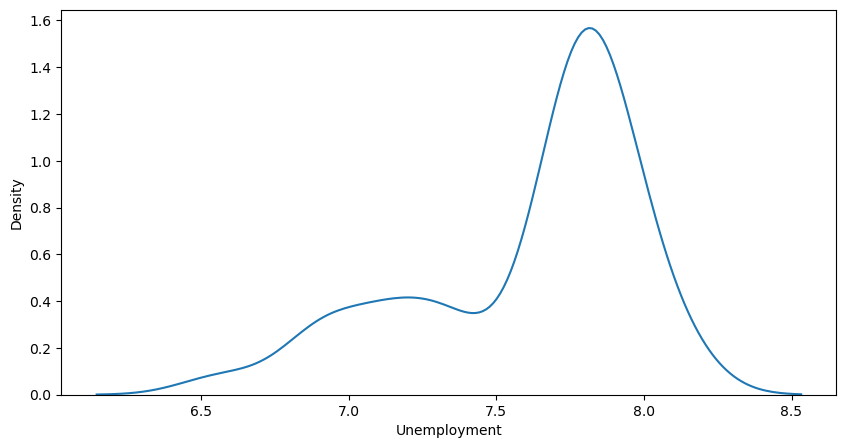

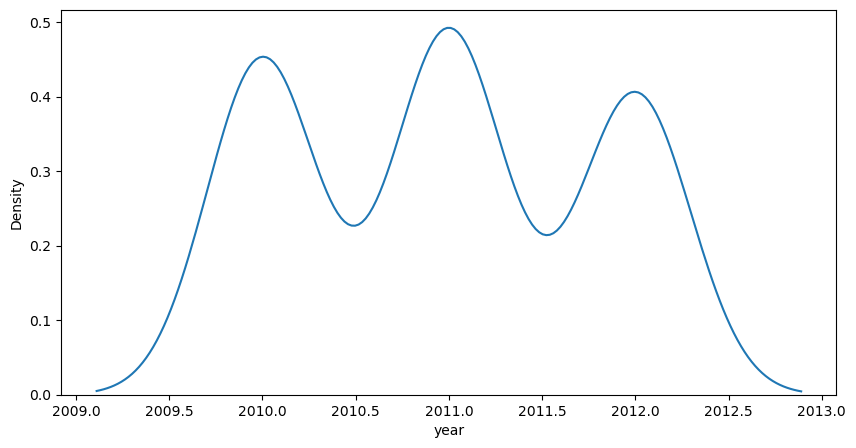

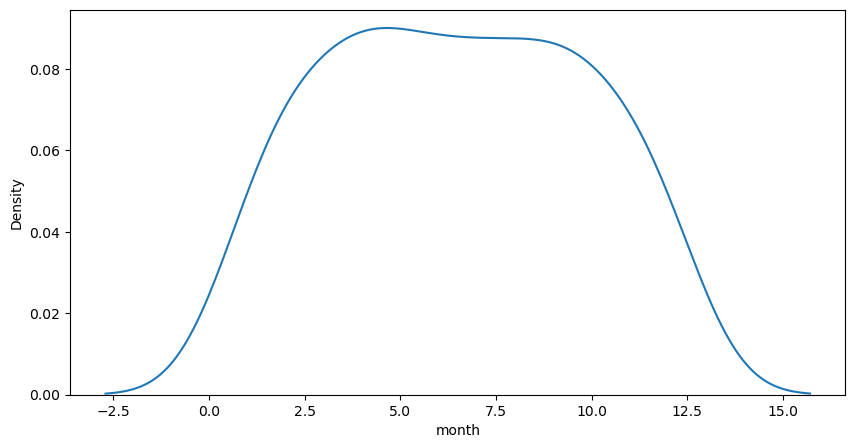

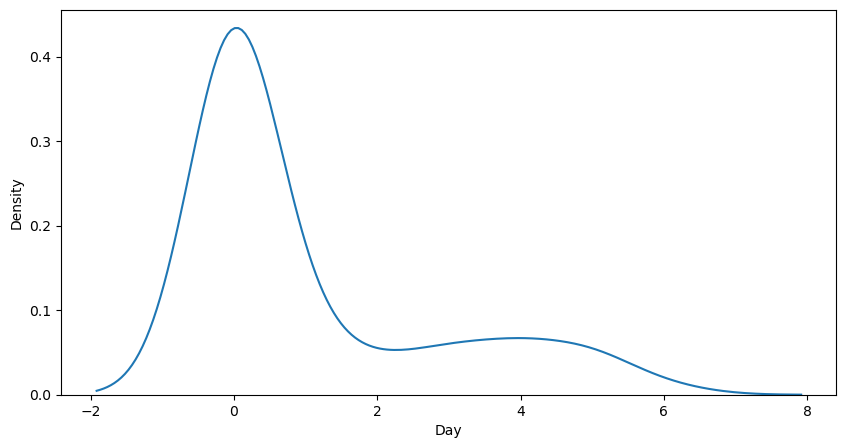

In [164]:
for i in model.select_dtypes(include="number").columns:
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=model,x=i)
    plt.show() ### Distribution graph of  Skewness 

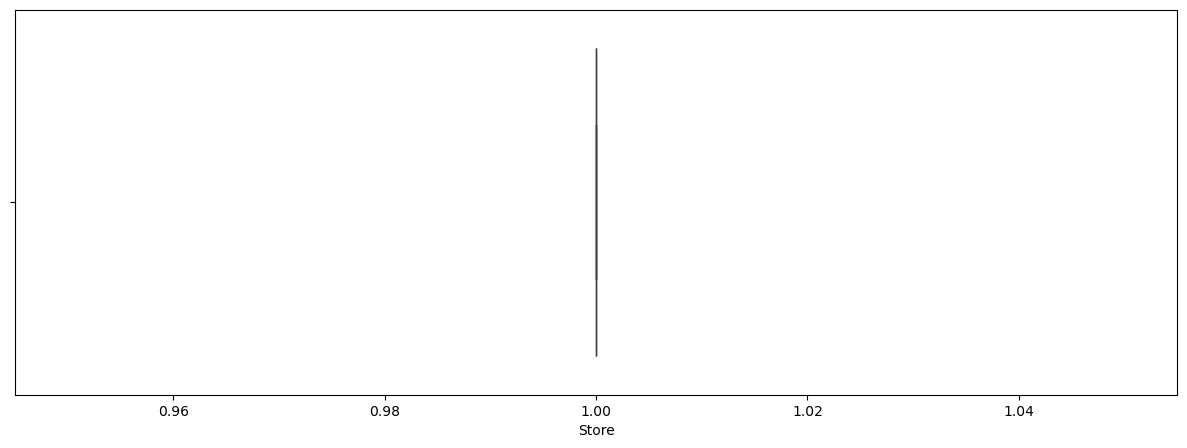

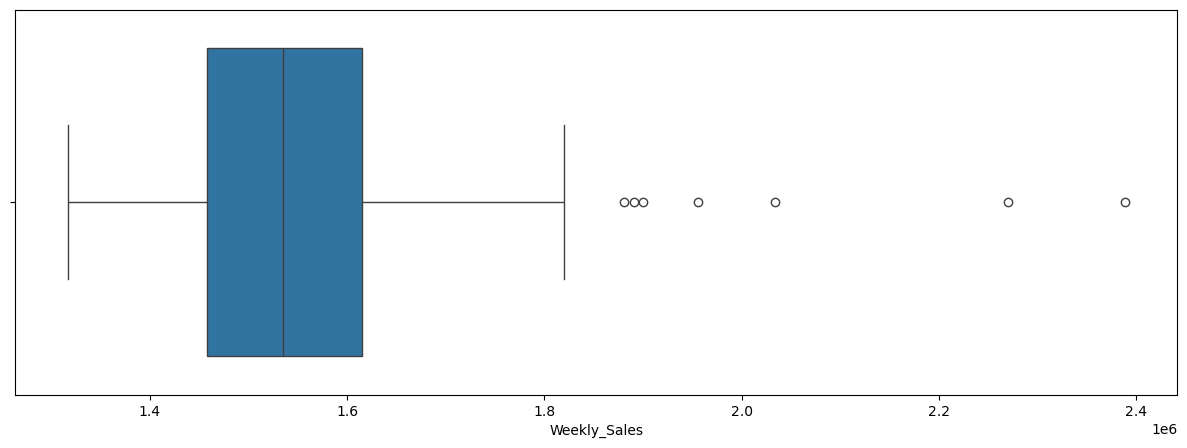

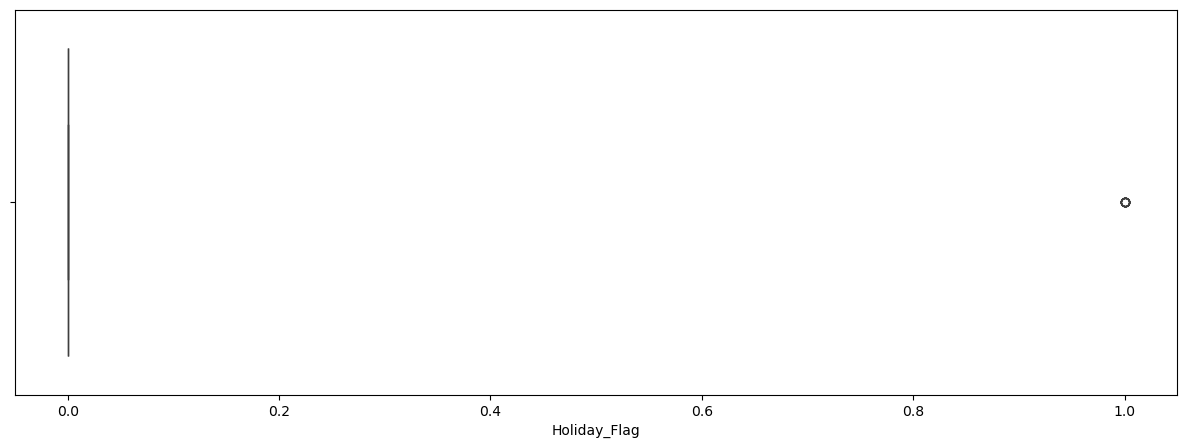

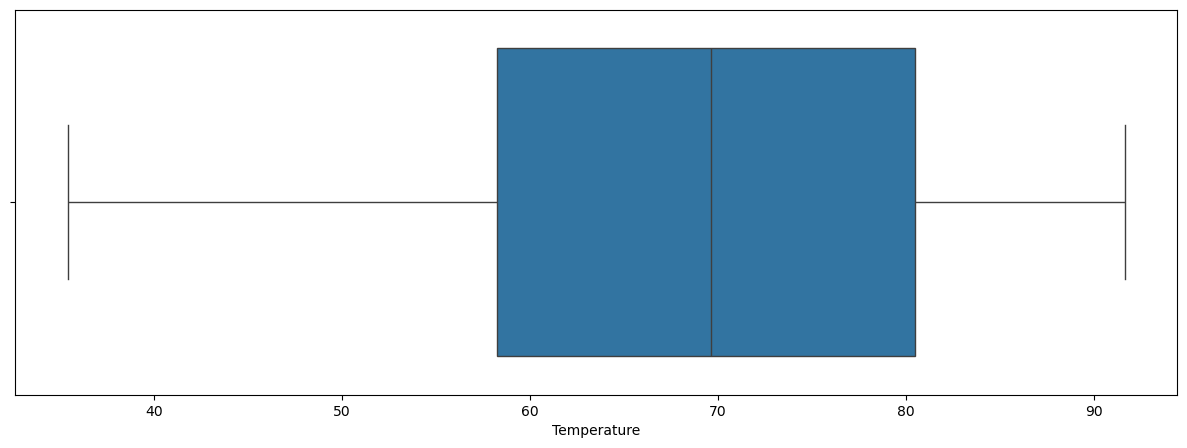

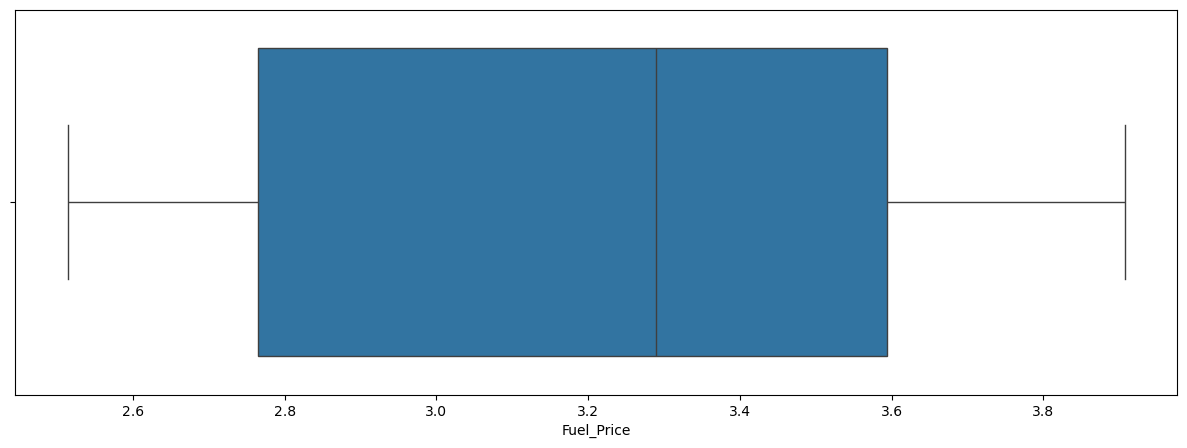

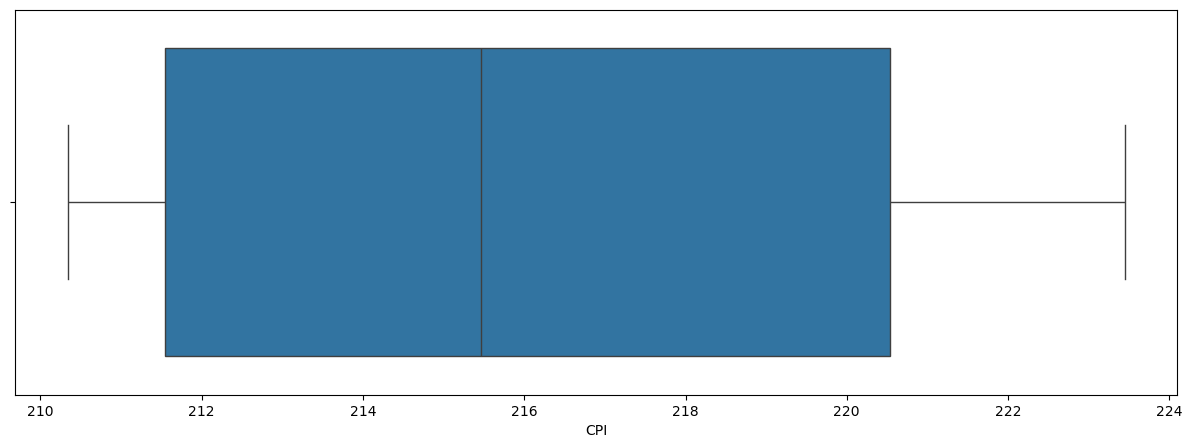

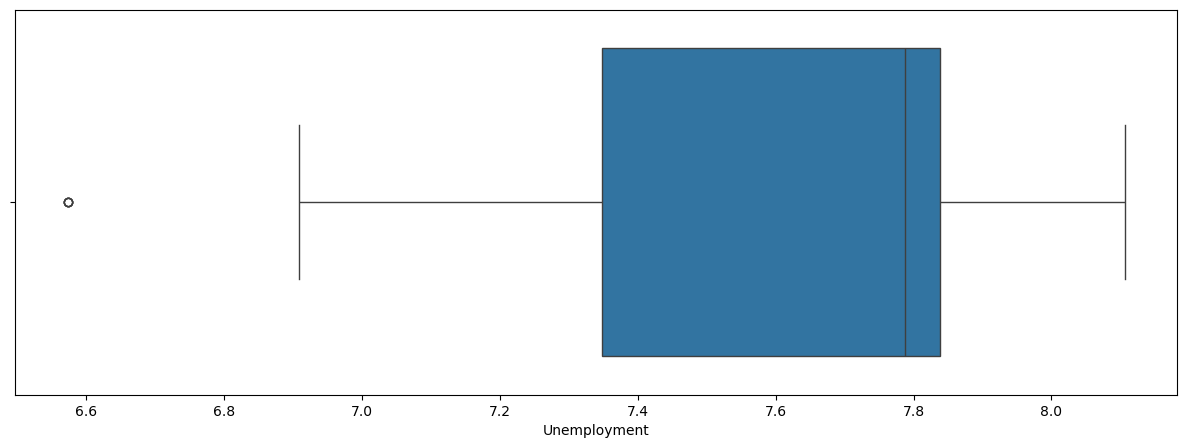

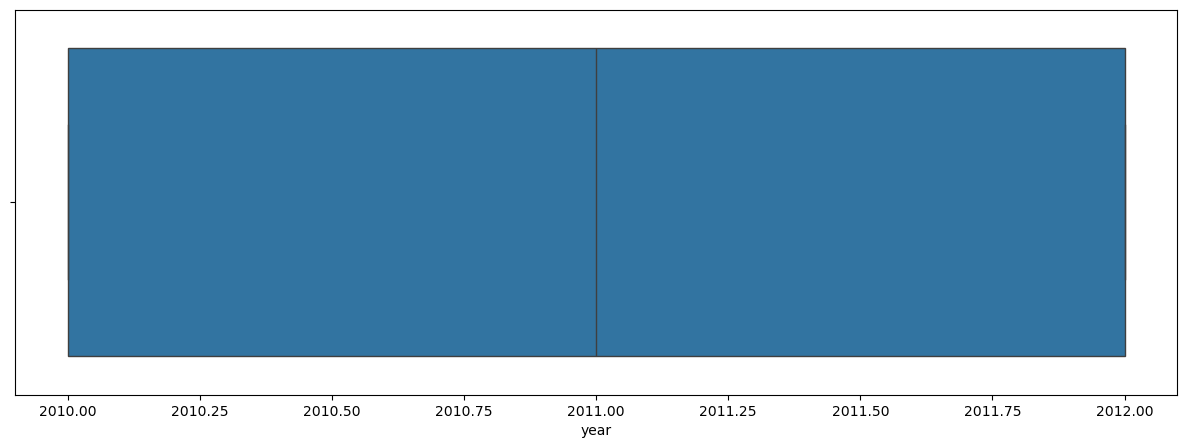

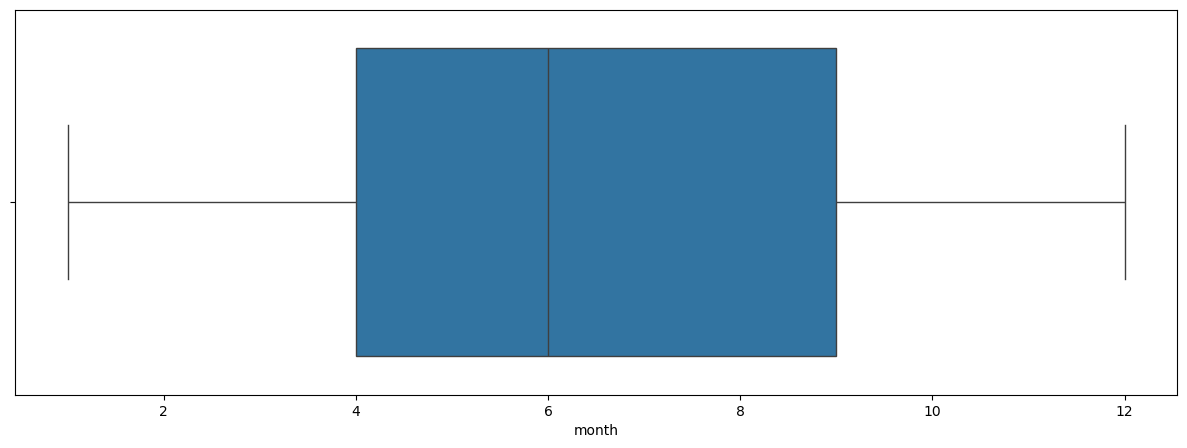

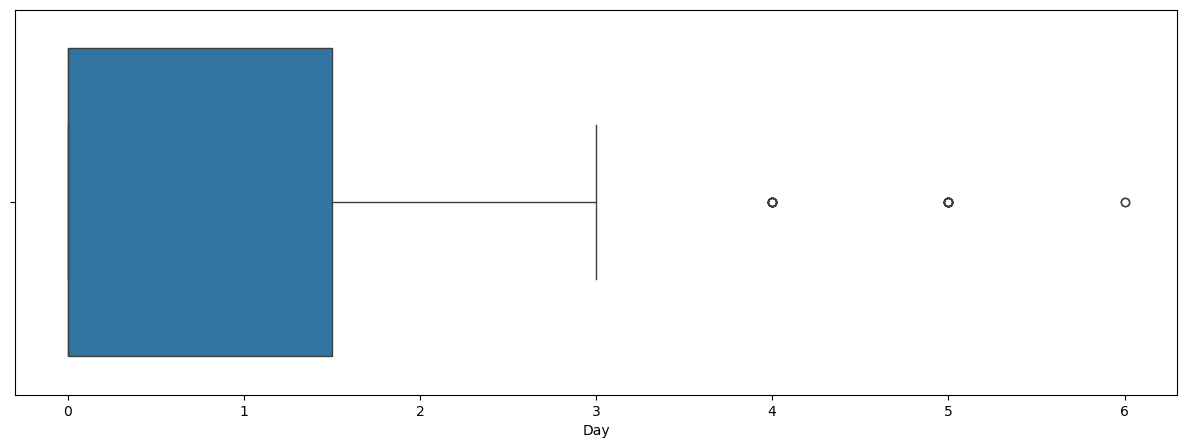

In [166]:
for i in model.select_dtypes(include="number").columns:
    plt.figure(figsize=(15,5))
    sns.boxplot(data=model,x=i)
    plt.show() ##Box plot 

In [136]:
model.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'year', 'month', 'Day'],
      dtype='object')

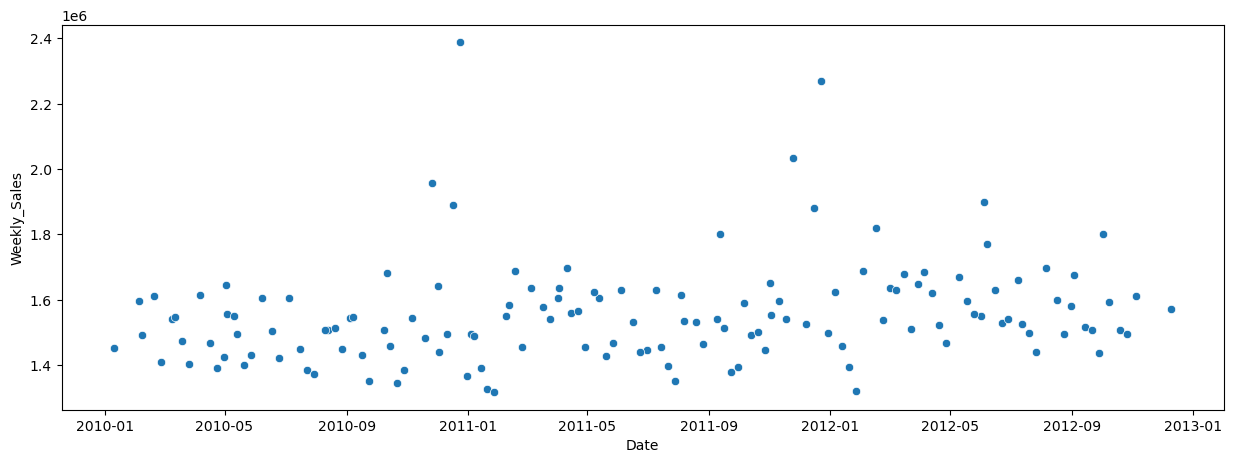

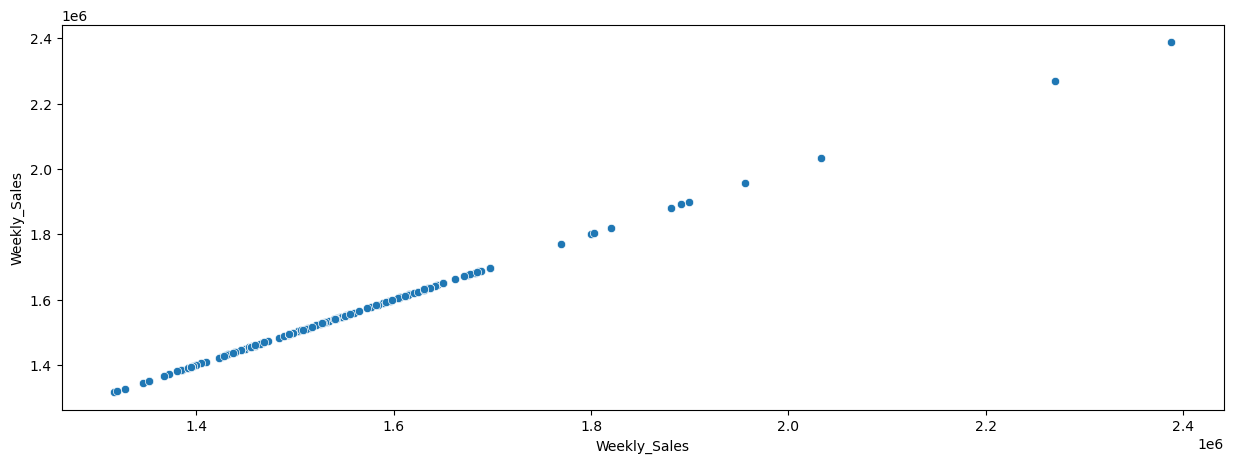

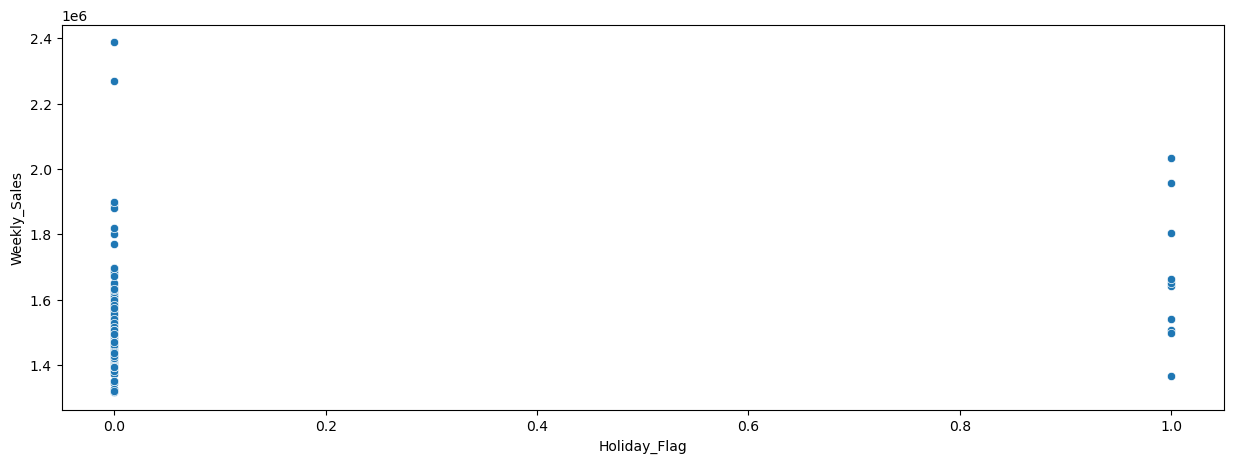

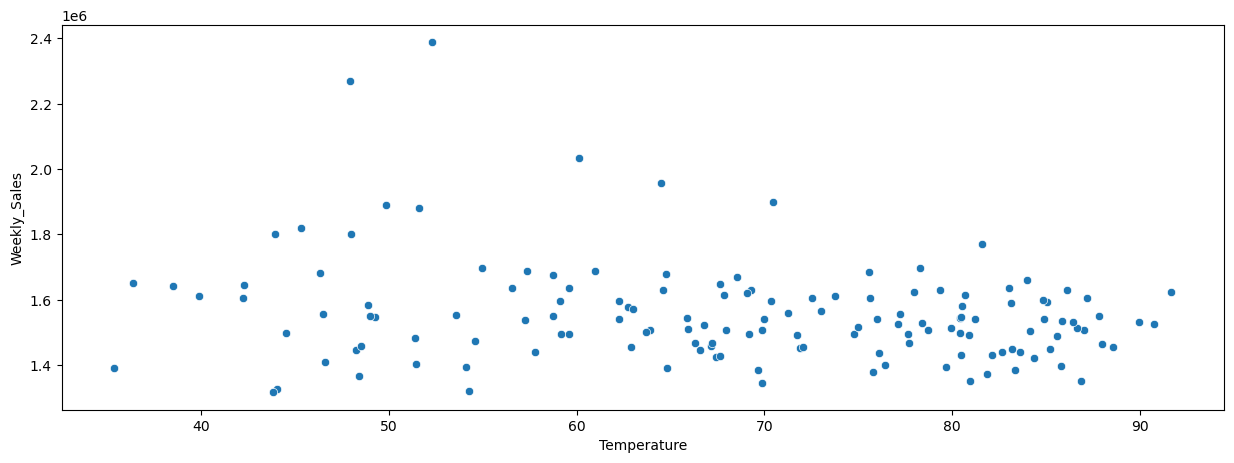

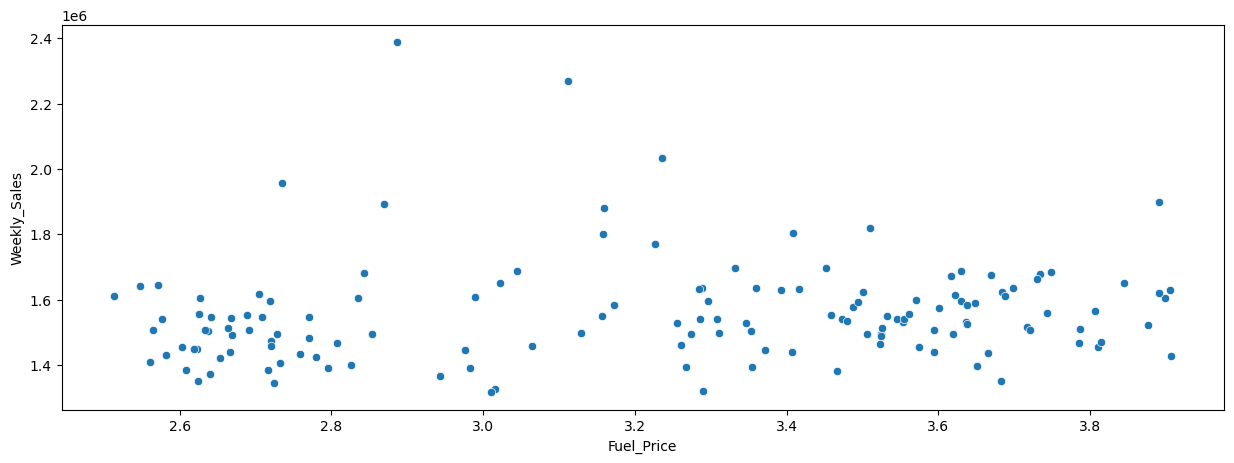

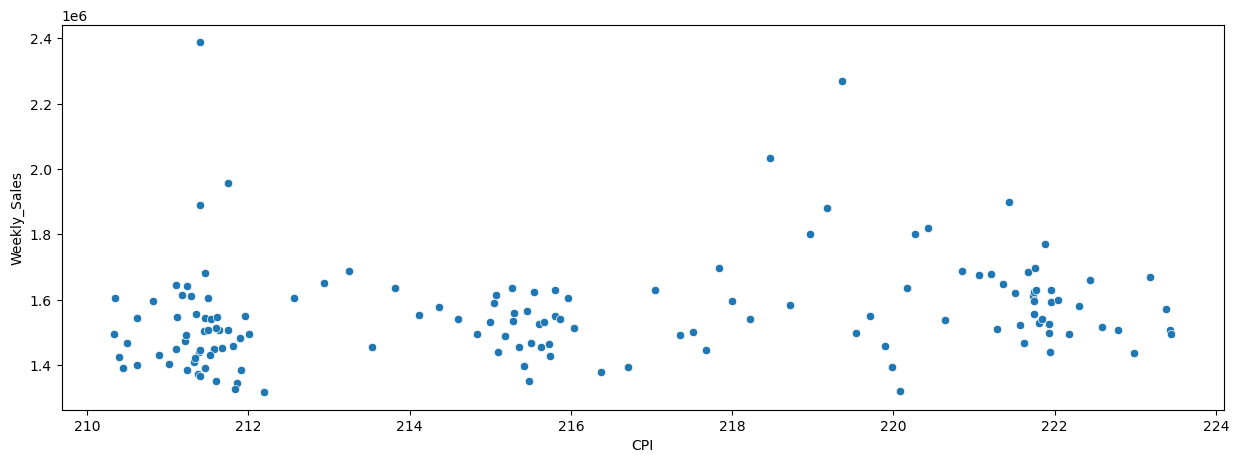

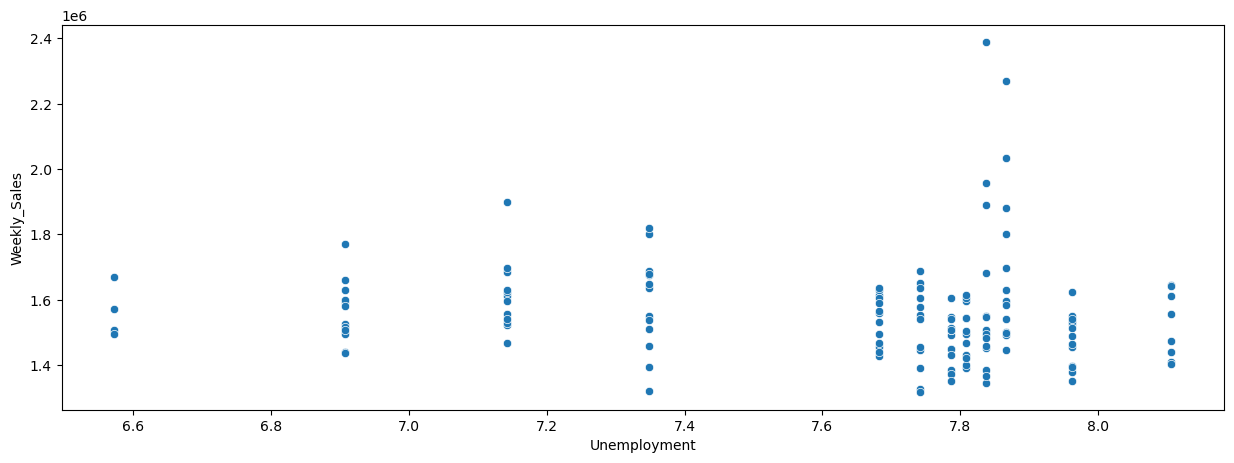

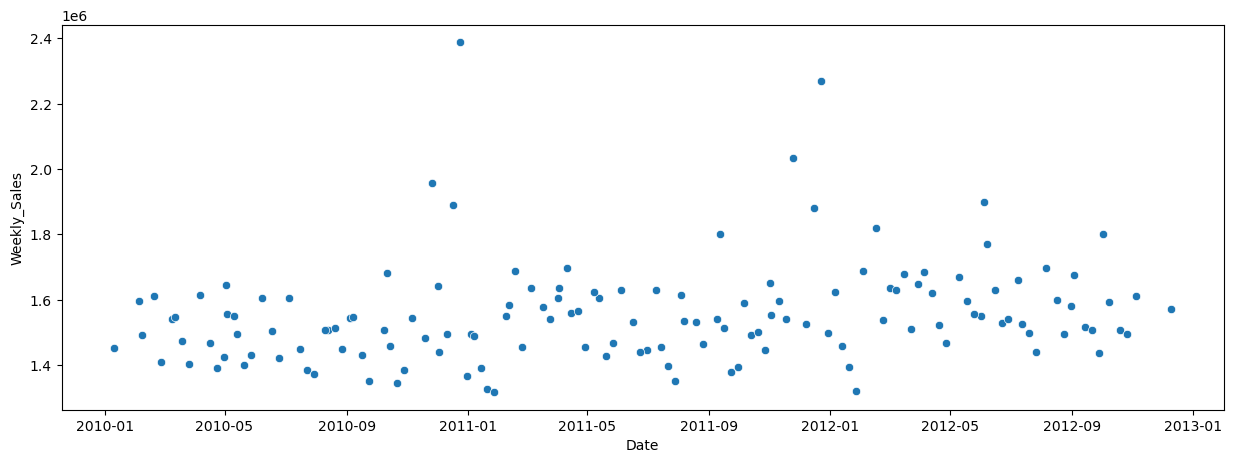

In [204]:
for i in ['Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment','Date']:
    plt.figure(figsize=(15,5))
    sns.scatterplot(data=model,y='Weekly_Sales',x=i)
    plt.show() ##Scattered Plot 

<Axes: >

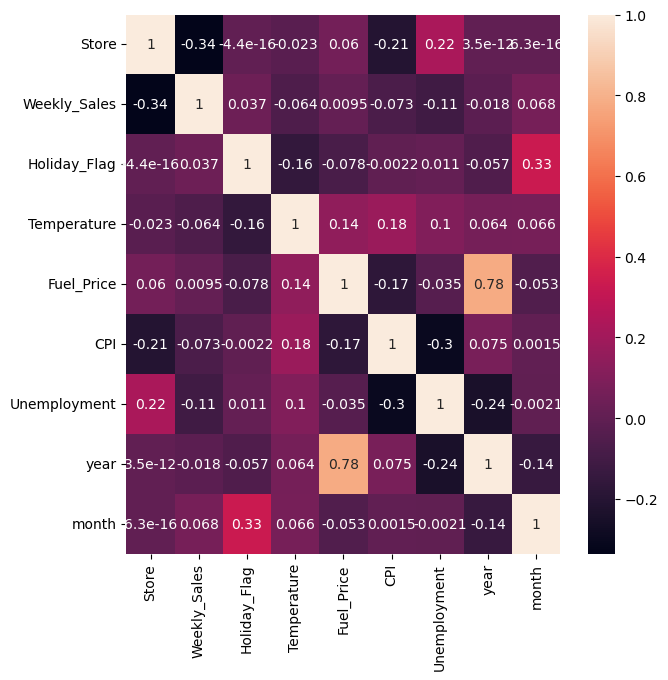

In [212]:
plt.figure(figsize=(7,7))
sns.heatmap(data=df.select_dtypes(include="number").corr(),annot=True)
## Heat Map representaion

In [214]:
model.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
year                     int32
month                    int32
Day                      int32
dtype: object

In [246]:
Final=model.drop(['Date'],axis=1)
Final

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,Day
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,3
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,4
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,0
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,0
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,1
...,...,...,...,...,...,...,...,...,...,...
138,1,1437059.26,0,76.08,3.666,222.981658,6.908,2012,9,0
139,1,1670785.97,0,68.55,3.617,223.181477,6.573,2012,5,4
140,1,1573072.81,0,62.99,3.601,223.381296,6.573,2012,12,1
141,1,1508068.77,0,67.97,3.594,223.425723,6.573,2012,10,0


<Axes: xlabel='Weekly_Sales', ylabel='Density'>

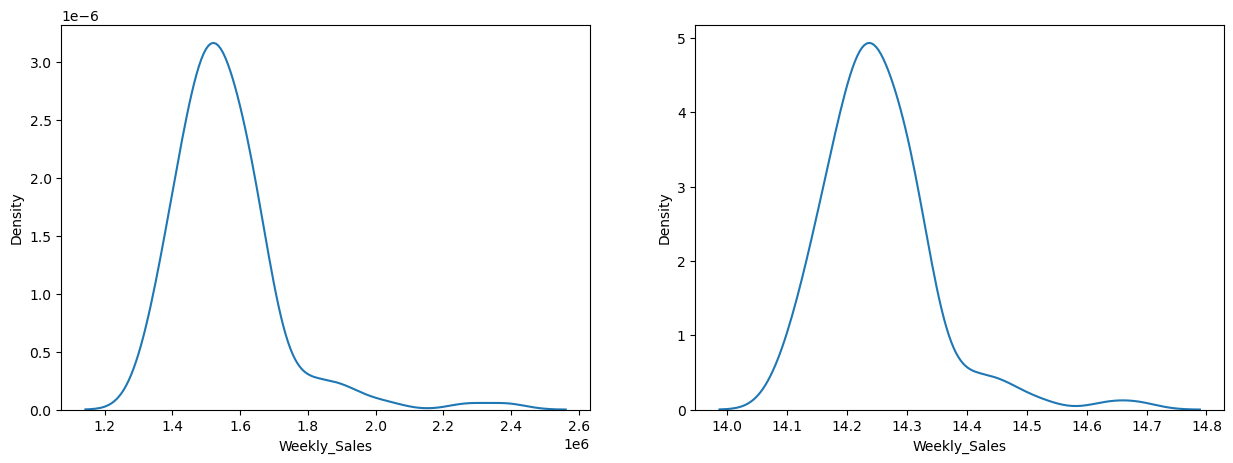

In [248]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.kdeplot(x=Final['Weekly_Sales'])
plt.subplot(1,2,2)
sns.kdeplot(x=np.log(Final['Weekly_Sales']))

In [228]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
## performing the train test to predict the factor that impact Weekly Sales

In [250]:
x=Final.drop('Weekly_Sales',axis=1)
y=Final['Weekly_Sales']

In [252]:
x_c=sm.add_constant(x)

In [254]:
x_train,x_test,y_train,y_test=train_test_split(x_c,y,test_size=.30,random_state=40)

In [258]:
test=sm.OLS(y_train,x_train.astype(float)).fit()

In [260]:
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     3.401
Date:                Fri, 27 Sep 2024   Prob (F-statistic):            0.00184
Time:                        14:29:07   Log-Likelihood:                -1333.2
No. Observations:                 100   AIC:                             2684.
Df Residuals:                      91   BIC:                             2708.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Store         3.604e+08   1.93e+08      1.866      0.065   -2.32e+07    7.44e+08
Holiday_Flag  3.753e+04   6.21e+04      0.604      0.547   -8.58e+04    1.61e+05
Temperature  -3690.8166   1234.447     -2.990      0.004   -6142.895   -1238.739
Fuel_Price    1.115e+05   8.13e+04      1.372      0.174      -5e+04    2.73e+05
CPI           3.298e+04   1.46e+04      2.260      0.026    3994.367     6.2e+04
Unemployment  6719.0286   7.63e+04      0.088      0.930   -1.45e+05    1.58e+05
year         -1.821e+05   9.72e+04     -1.873      0.064   -3.75e+05     1.1e+04
month         6096.4471   6001.605      1.016      0.312   -5825.005     1.8e+04
Day           1.829e+04   9649.138      1.896      0.061    -875.825    3.75e+04
==============================================================================
Omnibus:                       62.443   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.659
Skew:                           2.027   Prob(JB):                     2.11e-68
Kurtosis:                      10.639   Cond. No.                     2.50e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## On the Final conclusion the CPI , tempreature has Impact on sales rather than the Unemployment. 